CS21BTECH11008--> ADARSH SURESH BHENDE 

CS21BTECH11023-->JARUPULA SAI KUMAR


BDA:ASSIGNMENT-1

In [40]:
import numpy as np
import pymc3 as pm

Given Pump data

In [41]:
x = np.array([5, 1, 5, 14, 3, 19, 1, 1, 4, 22])
t = np.array([94.3, 15.7, 62.9, 126, 5.24, 31.4, 1.05, 1.05, 2.1, 10.5])
#Number of Pumps
N = len(x)
print("OK")

OK


Priors for Gamma distribution parameters

Defining the Hierarchical Model

In [42]:
with pm.Model() as model:
    # this are the corrected alpha and beta
    alpha = pm.Exponential("alpha", 1)
    beta = pm.Gamma("beta", 0.1, 1)

  # Latent variables
    # theta = pm.Gamma("theta", alpha=alpha, beta=beta, shape=len(failures))


    # Priors for the rate parameters lambda
    lambda_ = pm.Gamma('lambda_', alpha=alpha, beta=beta, shape=N)
    
    #Poisson distribution (Likelyhood)
    failures = pm.Poisson('failures', mu=lambda_ * t, observed=x)
    
    # Sample from the posterior distribution
    trace = pm.sample(1000, tune=1000, cores=1)  # can be adjusted as per the requirement
    approx = pm.fit(1000, method='advi')  # VI approximation

/home/vboxuser/.local/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [lambda_, beta, alpha]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.


Finished [100%]: Average Loss = 2,440.1


Statastics MCMC

In [43]:
summary_MCMC = pm.summary(trace)
print(summary_MCMC)

Got error No model on context stack. trying to find log_likelihood in translation.
/home/vboxuser/.local/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha       0.703  0.266   0.267    1.201      0.007    0.005    1591.0   
beta        0.938  0.555   0.088    1.901      0.014    0.011    1832.0   
lambda_[0]  0.060  0.026   0.014    0.105      0.001    0.000    2426.0   
lambda_[1]  0.101  0.079   0.003    0.245      0.002    0.001    2215.0   
lambda_[2]  0.089  0.038   0.030    0.159      0.001    0.001    2340.0   
lambda_[3]  0.116  0.030   0.061    0.171      0.001    0.000    2544.0   
lambda_[4]  0.605  0.316   0.093    1.176      0.006    0.005    2373.0   
lambda_[5]  0.605  0.135   0.376    0.874      0.003    0.002    2463.0   
lambda_[6]  0.904  0.721   0.012    2.130      0.016    0.013    2282.0   
lambda_[7]  0.903  0.709   0.012    2.212      0.014    0.011    2426.0   
lambda_[8]  1.578  0.765   0.415    3.041      0.014    0.010    2508.0   
lambda_[9]  1.995  0.411   1.247    2.751      0.008    0.006    2567.0   

            ess_tail  r_

Statastic VI

In [44]:
# Extract summary statistics from the approximate posterior (VI)
# summary_VI = approx.summary()
# print("VI Summary:")
# print(summary_VI)

# Convert VI result to trace
trace_VI = approx.sample(1000)

# Extract summary statistics from the trace
summary_trace_VI = pm.summary(trace_VI)
print("VI Trace Summary:")
print(summary_trace_VI)

Got error No model on context stack. trying to find log_likelihood in translation.
/home/vboxuser/.local/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


VI Trace Summary:
             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha       0.903  0.654   0.134    1.990      0.021    0.015     958.0   
beta        0.118  0.090   0.018    0.265      0.003    0.002     918.0   
lambda_[0]  6.597  4.741   0.877   14.622      0.154    0.111    1049.0   
lambda_[1]  6.387  4.217   0.925   13.204      0.133    0.094     963.0   
lambda_[2]  6.343  4.495   0.643   13.765      0.160    0.114     873.0   
lambda_[3]  6.646  5.124   1.011   15.241      0.155    0.111    1072.0   
lambda_[4]  6.406  4.184   0.734   13.492      0.131    0.094     998.0   
lambda_[5]  6.575  4.776   0.828   15.268      0.147    0.104    1021.0   
lambda_[6]  6.802  4.835   0.744   15.144      0.164    0.116     837.0   
lambda_[7]  6.833  4.836   0.808   15.345      0.158    0.112     928.0   
lambda_[8]  6.775  5.371   0.987   15.277      0.177    0.128     978.0   
lambda_[9]  6.632  4.466   1.066   14.743      0.156    0.110     790.0   

      

Testing part

In [45]:
lambda_samples = trace['lambda_']

#Prediction Making 
predicted_failures = np.mean(lambda_samples, axis=0) * t

# Calculating Mean Absolute Error (MAE)
actual_failures = np.array([5, 1, 5, 14, 3, 19, 1, 1, 4, 22])  # Actual ailures as per the data
mae = np.mean(np.abs(predicted_failures - actual_failures))
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.44107512667907295


In [46]:
lambda_samples_VI = trace_VI['lambda_']
predicted_failures_VI = np.mean(lambda_samples_VI, axis=0) * t

# Calculating Mean Absolute Error (MAE) for VI
mae_VI = np.mean(np.abs(predicted_failures_VI - actual_failures))
print("Mean Absolute Error (MAE) for VI:", mae_VI)

Mean Absolute Error (MAE) for VI: 222.1866561752501


Posterior Distribution Plots

Got error No model on context stack. trying to find log_likelihood in translation.
/home/vboxuser/.local/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


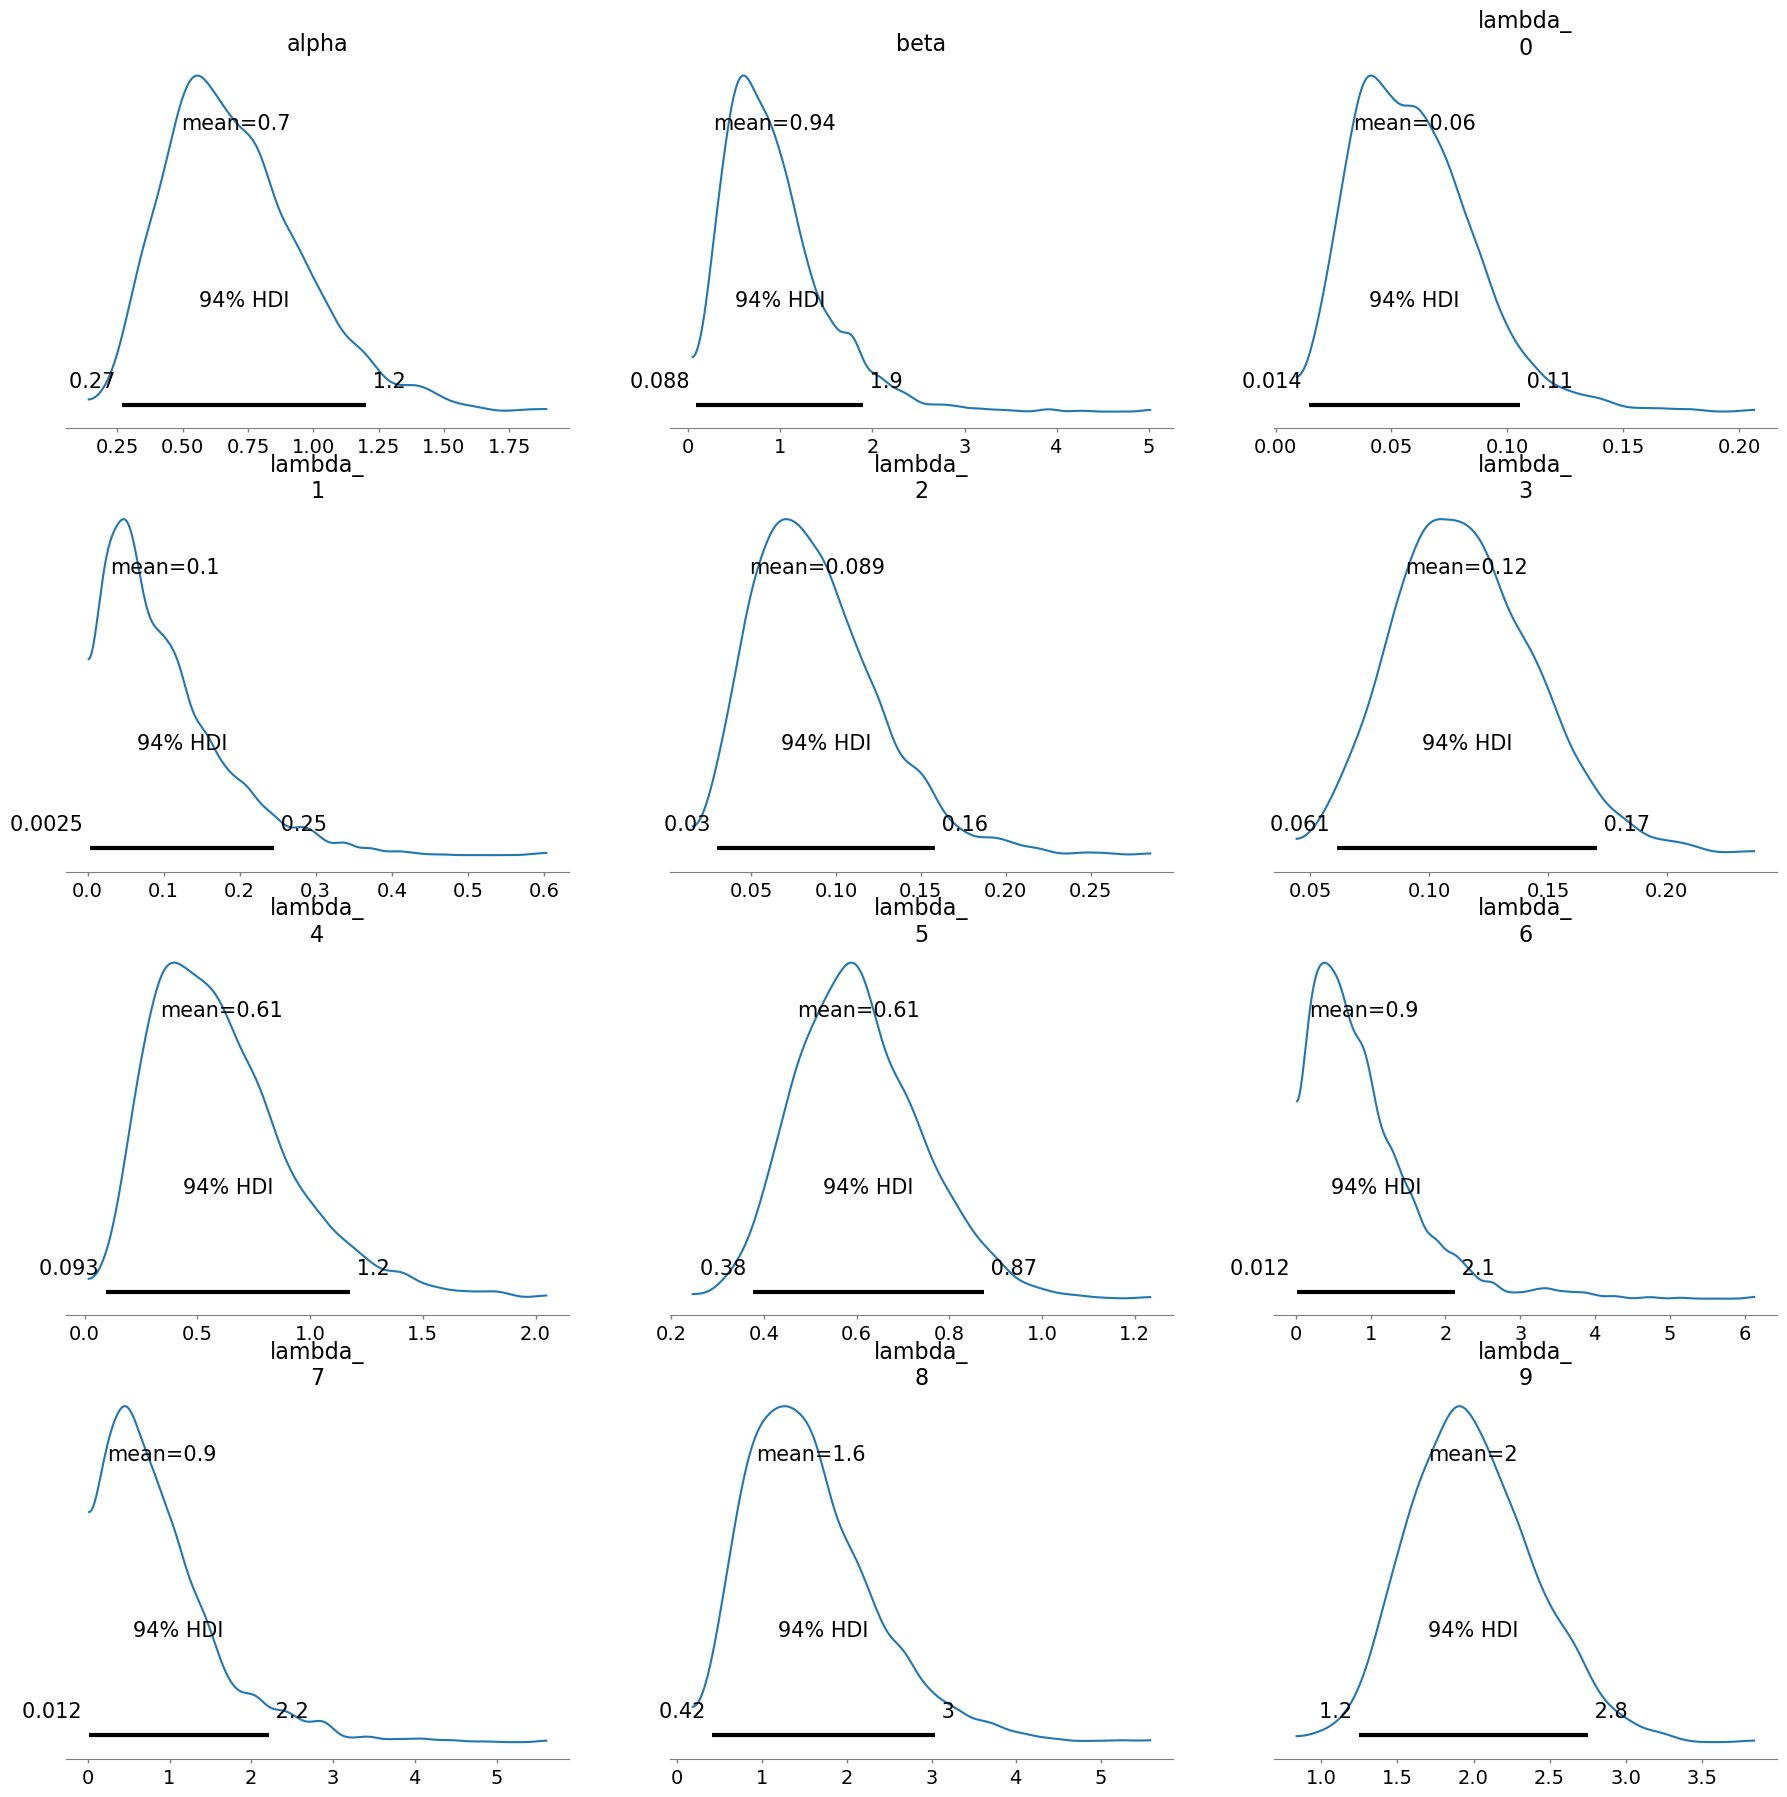

In [47]:
import arviz as az
import matplotlib.pyplot as plt 
az.plot_posterior(trace)
plt.show()

Got error No model on context stack. trying to find log_likelihood in translation.


/home/vboxuser/.local/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


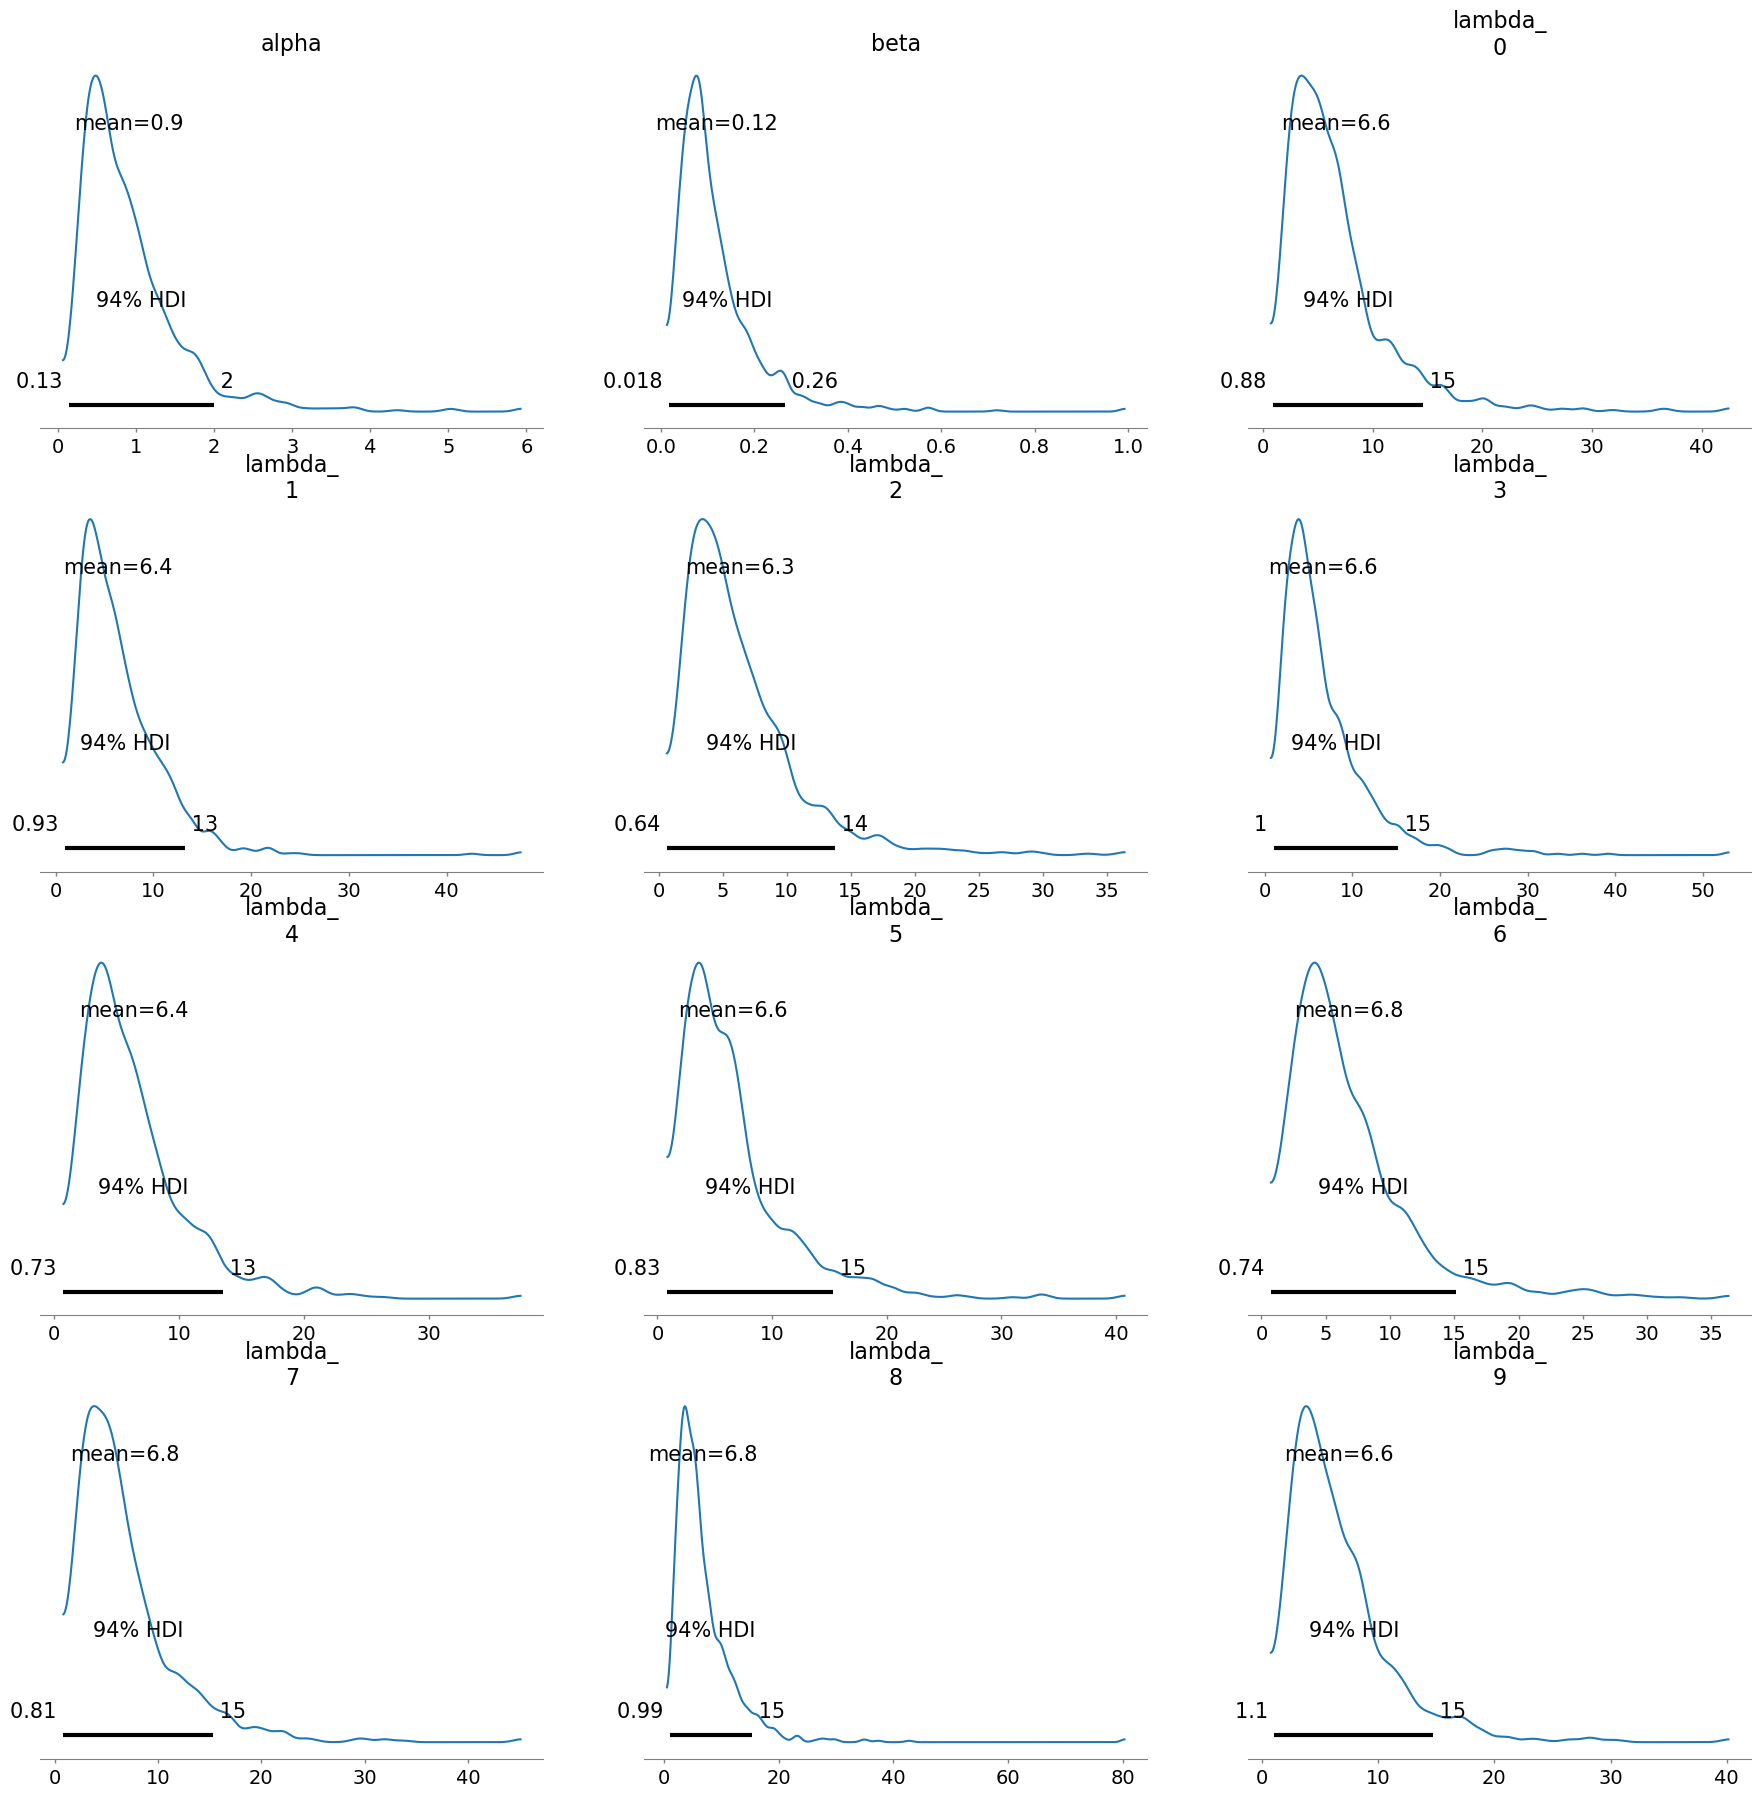

In [48]:
az.plot_posterior(trace_VI)
plt.show()